## Exploring the `Object` table

The `Object` table contains the key measurements/features for each object. In this notebook, we will provide a few minimum examples about how to explore the `Object` table.

In [1]:
## commonly used modules
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
import os, sys
import yaml

pd.set_option('display.max_columns', 999)
mpl.rc_file('https://raw.githubusercontent.com/ywx649999311/configs/master/viz/yuBasic.rc')

## Data challenge root data dir
data_dir = "/home/idies/workspace/Temporary/ywx649999311/LSST_AGN/Class_Training/DC/"

In [2]:
!ls "/home/idies/workspace/Temporary/ywx649999311/LSST_AGN/Class_Training/DC/"

ForcedSourceTable.parquet  lc_feats.yml		   xmmlssObjectTable.parquet
ObjectTable.parquet	   s82ObjectTable.parquet  xmmlssSourceTable.parquet
SourceTable.parquet	   s82SourceTable.parquet


### 1. Load the table

In [3]:
# It will take up to ~30 secs
object_df = pd.read_parquet(os.path.join(data_dir, 'ObjectTable.parquet'))
object_df.head(3)

,ra,dec,psPm_ra,psPm_dec,psParallax,psFlux_u,psFlux_g,psFlux_r,psFlux_i,psFlux_z,psFlux_y,psFluxErr_u,psFluxErr_g,psFluxErr_r,psFluxErr_i,psFluxErr_z,psFluxErr_y,bdFlux_u,bdFlux_g,bdFlux_r,bdFlux_i,bdFlux_z,bdFlux_y,bdFluxErr_u,bdFluxErr_g,bdFluxErr_r,bdFluxErr_i,bdFluxErr_z,bdFluxErr_y,psMag_u,psMag_g,psMag_r,psMag_i,psMag_z,psMag_y,psMagErr_u,psMagErr_g,psMagErr_r,psMagErr_i,psMagErr_z,psMagErr_y,bdMag_u,bdMag_g,bdMag_r,bdMag_i,bdMag_z,bdMag_y,bdMagErr_u,bdMagErr_g,bdMagErr_r,bdMagErr_i,bdMagErr_z,bdMagErr_y,extendedness_u,extendedness_g,extendedness_r,extendedness_i,extendedness_z,extendedness_y,stdColor_0,stdColor_1,stdColor_2,stdColor_3,stdColor_4,stdColorErr_0,stdColorErr_1,stdColorErr_2,stdColorErr_3,stdColorErr_4,class,photoZ_pest,z,flags_u,flags_g,flags_r,flags_i,flags_z,flags_y,lcPeriodic[0]_g,lcPeriodic[0]_r,lcPeriodic[0]_i,lcPeriodic[1]_g,lcPeriodic[1]_r,lcPeriodic[1]_i,lcPeriodic[2]_g,lcPeriodic[2]_r,lcPeriodic[2]_i,lcPeriodic[3]_g,lcPeriodic[3]_r,lcPeriodic[3]_i,lcPeriodic[4]_u,lcPeriodic[4]_g,lcPeriodic[4]_r,lcPeriodic[4]_i,lcPeriodic[4]_z,lcPeriodic[5]_u,lcPeriodic[5]_g,lcPeriodic[5]_r,lcPeriodic[5]_i,lcPeriodic[5]_z,lcPeriodic[6]_u,lcPeriodic[6]_g,lcPeriodic[6]_r,lcPeriodic[6]_i,lcPeriodic[6]_z,lcPeriodic[7]_u,lcPeriodic[7]_g,lcPeriodic[7]_r,lcPeriodic[7]_i,lcPeriodic[7]_z,lcPeriodic[8]_u,lcPeriodic[8]_g,lcPeriodic[8]_r,lcPeriodic[8]_i,lcPeriodic[8]_z,lcPeriodic[9]_u,lcPeriodic[9]_g,lcPeriodic[9]_r,lcPeriodic[9]_i,lcPeriodic[9]_z,lcPeriodic[10]_u,lcPeriodic[10]_g,lcPeriodic[10]_r,lcPeriodic[10]_i,lcPeriodic[10]_z,lcPeriodic[11]_u,lcPeriodic[11]_g,lcPeriodic[11]_r,lcPeriodic[11]_i,lcPeriodic[11]_z,lcPeriodic[12]_u,lcPeriodic[12]_g,lcPeriodic[12]_r,lcPeriodic[12]_i,lcPeriodic[12]_z,lcPeriodic[13]_u,lcPeriodic[13]_g,lcPeriodic[13]_r,lcPeriodic[13]_i,lcPeriodic[13]_z,lcPeriodic[14]_u,lcPeriodic[14]_g,lcPeriodic[14]_r,lcPeriodic[14]_i,lcPeriodic[14]_z,lcPeriodic[15]_u,lcPeriodic[15]_g,lcPeriodic[15]_r,lcPeriodic[15]_i,lcPeriodic[15]_z,lcPeriodic[16]_u,lcPeriodic[16]_g,lcPeriodic[16]_r,lcPeriodic[16]_i,lcPeriodic[16]_z,lcPeriodic[17]_u,lcPeriodic[17]_g,lcPeriodic[17]_r,lcPeriodic[17]_i,lcPeriodic[17]_z,lcPeriodic[18]_u,lcPeriodic[18]_g,lcPeriodic[18]_r,lcPeriodic[18]_i,lcPeriodic[18]_z,lcPeriodic[19]_u,lcPeriodic[19]_g,lcPeriodic[19]_r,lcPeriodic[19]_i,lcPeriodic[19]_z,lcPeriodic[20]_u,lcPeriodic[20]_g,lcPeriodic[20]_r,lcPeriodic[20]_i,lcPeriodic[20]_z,lcPeriodic[21]_u,lcPeriodic[21]_g,lcPeriodic[21]_r,lcPeriodic[21]_i,lcPeriodic[21]_z,lcPeriodic[22]_u,lcPeriodic[22]_g,lcPeriodic[22]_r,lcPeriodic[22]_i,lcPeriodic[22]_z,lcPeriodic[23]_u,lcPeriodic[23]_g,lcPeriodic[23]_r,lcPeriodic[23]_i,lcPeriodic[23]_z,lcPeriodic[24]_u,lcPeriodic[24]_g,lcPeriodic[24]_r,lcPeriodic[24]_i,lcPeriodic[24]_z,lcPeriodic[25]_u,lcPeriodic[25]_g,lcPeriodic[25]_r,lcPeriodic[25]_i,lcPeriodic[25]_z,lcPeriodic[26]_u,lcPeriodic[26]_g,lcPeriodic[26]_r,lcPeriodic[26]_i,lcPeriodic[26]_z,lcPeriodic[27]_u,lcPeriodic[27]_g,lcPeriodic[27]_r,lcPeriodic[27]_i,lcPeriodic[27]_z,lcPeriodic[28]_u,lcPeriodic[28]_g,lcPeriodic[28]_r,lcPeriodic[28]_i,lcPeriodic[28]_z,lcPeriodic[29]_u,lcPeriodic[29]_g,lcPeriodic[29]_r,lcPeriodic[29]_i,lcPeriodic[29]_z,lcPeriodic[30]_u,lcPeriodic[30]_g,lcPeriodic[30]_r,lcPeriodic[30]_i,lcPeriodic[30]_z,lcPeriodic[31]_u,lcPeriodic[31]_g,lcPeriodic[31]_r,lcPeriodic[31]_i,lcPeriodic[31]_z,lcPeriodic[32]_u,lcPeriodic[32]_g,lcPeriodic[32]_r,lcPeriodic[32]_i,lcPeriodic[32]_z,lcNonPeriodic[0]_u,lcNonPeriodic[0]_g,lcNonPeriodic[0]_r,lcNonPeriodic[0]_i,lcNonPeriodic[0]_z,lcNonPeriodic[1]_u,lcNonPeriodic[1]_g,lcNonPeriodic[1]_r,lcNonPeriodic[1]_i,lcNonPeriodic[1]_z,lcNonPeriodic[2]_u,lcNonPeriodic[2]_g,lcNonPeriodic[2]_r,lcNonPeriodic[2]_i,lcNonPeriodic[2]_z,lcNonPeriodic[3]_u,lcNonPeriodic[3]_g,lcNonPeriodic[3]_r,lcNonPeriodic[3]_i,lcNonPeriodic[3]_z,lcNonPeriodic[4]_u,lcNonPeriodic[4]_g,lcNonPeriodic[4]_r,lcNonPeriodic[4]_i,lcNonPeriodic[4]_z,lcNonPeriodic[5]_u,lcNonPeriodic[5]_g,lcNonPeriodic[5]_r,lcNonPeriodic[5]_i,lcNonPeriodic[5]_z,lcNo

### 2. Make some plots

#### 2.1 Color-Color plots

In [4]:
# get objects in different classes
star = object_df[(object_df['class'] == 'Star') & ~object_df.z.isnull()]
galaxy = object_df[object_df['class'] == 'Gal']
qso = object_df[object_df['class'] == 'Qso']

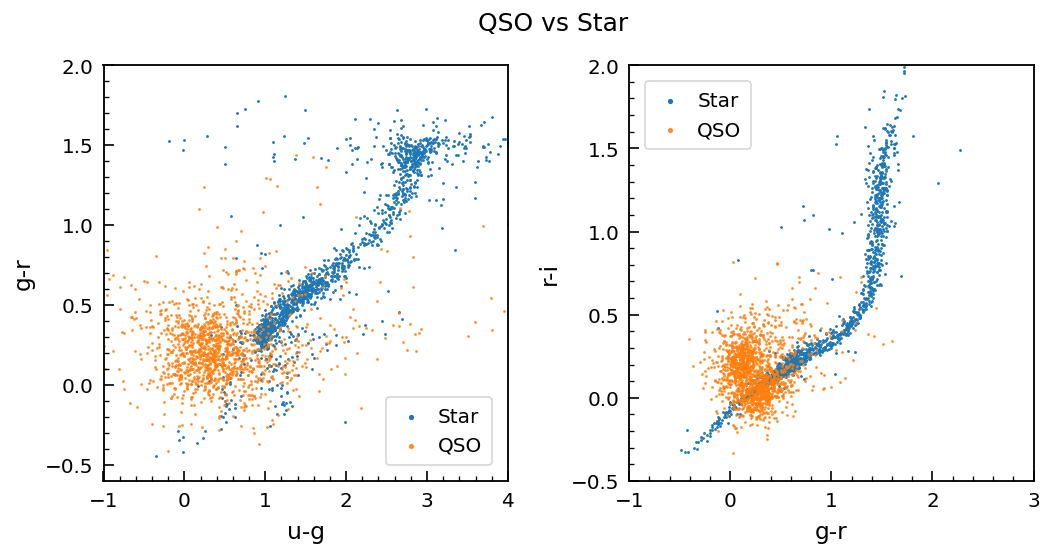

In [5]:
fig, axes = plt.subplots(1, 2, figsize=(10, 4.5), dpi=120)

## u-g vs g-r
axes[0].scatter(star['stdColor_0'][::50], star['stdColor_1'][::50], 
            s=.5, label='Star')
axes[0].scatter(qso['stdColor_0'][::50], qso['stdColor_1'][::50], 
            s=.5, label='QSO', alpha=0.8)
axes[0].set_xlim(-1, 4)
axes[0].set_ylim(-0.6, 2)
axes[0].set_xlabel('u-g')
axes[0].set_ylabel('g-r')
axes[0].legend()

## g-r vs r-i
axes[1].scatter(star['stdColor_1'][::50], star['stdColor_2'][::50], 
            s=.5, label='Star')
axes[1].scatter(qso['stdColor_1'][::50], qso['stdColor_2'][::50], 
            s=.5, label='QSO', alpha=0.8)
axes[1].set_xlim(-1, 3)
axes[1].set_ylim(-0.5, 2)
axes[1].set_xlabel('g-r')
axes[1].set_ylabel('r-i')
axes[1].legend()

# common plot configs
plt.suptitle('QSO vs Star')
plt.subplots_adjust(wspace=0.3)

#### 2.2 Distribution of light curves features

##### -> Reduced $\chi^{2}$ (or $\chi^{2} per degree of freedom)
$$\chi^{2} / \text { d.o.f. }=\frac{1}{N-1} \sum_{i=1}^{N}\left(\frac{m_{i}-\bar{m}}{\sigma_{i}}\right)^{2}$$

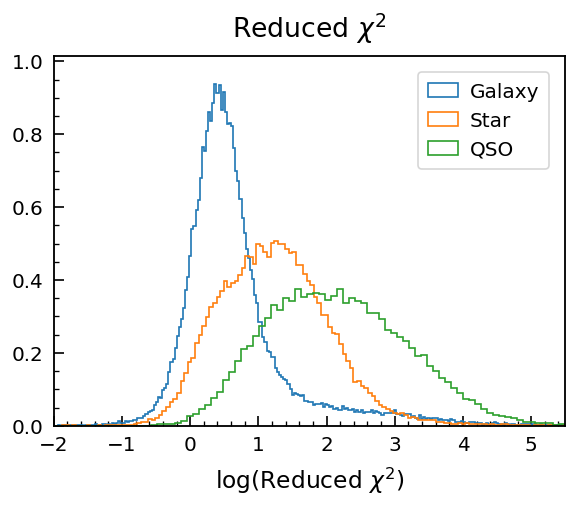

In [19]:
feat_col = 'lcNonPeriodic[22]_g'
fig = plt.figure(figsize=(5.5, 4), dpi=120)
_ = plt.hist(np.log(galaxy[feat_col]), 
             bins='fd', histtype='step', density=True, label='Galaxy')
_ = plt.hist(np.log(star[feat_col]), 
             bins='fd', histtype='step',density=True, label='Star')
_ = plt.hist(np.log(qso[feat_col]), 
             bins='fd', histtype='step',density=True, label='QSO')

plt.legend()
plt.xlabel('log(Reduced $\chi^{2}$)')
plt.title('Reduced $\chi^{2}$')
_ = plt.xlim(-2, 5.5)

##### -> __von Neumann ratio__
$$\eta=\frac{1}{(N-1) \sigma^{2}} \sum_{i=1}^{N-1}\left(m_{i+1}-m_{i}\right)^{2}$$

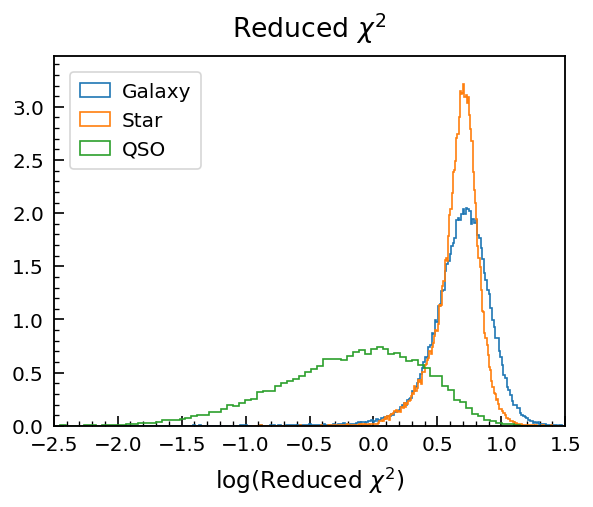

In [21]:
feat_col = 'lcNonPeriodic[26]_g'
fig = plt.figure(figsize=(5.5, 4), dpi=120)
_ = plt.hist(np.log(galaxy[feat_col]), 
             bins='fd', histtype='step', density=True, label='Galaxy')
_ = plt.hist(np.log(star[feat_col]), 
             bins='fd', histtype='step',density=True, label='Star')
_ = plt.hist(np.log(qso[feat_col]), 
             bins='fd', histtype='step',density=True, label='QSO')

plt.legend()
plt.xlabel('log(von Neumann ratio)')
plt.title('von Neumann ratio')
_ = plt.xlim(-2.5, 1.5)

##### -> __Range of a cumulative sum, see 'arXiv:1101.3316'__
$$
\begin{aligned}
R_{\mathrm{CS}} &=\max (S)-\min (S) \\
S_{l} &=\frac{1}{N \sigma} \sum_{i=1}^{l}\left(m_{i}-\bar{m}\right)
\end{aligned}
$$

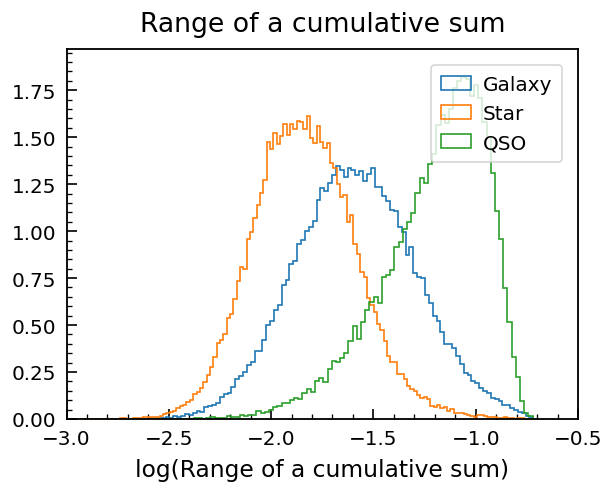

In [66]:
feat_col = 'lcNonPeriodic[25]_g'
fig = plt.figure(figsize=(5.5, 4), dpi=120)
_ = plt.hist(np.log(galaxy[feat_col]), 
             bins='fd', histtype='step', density=True, label='Galaxy')
_ = plt.hist(np.log(star[feat_col]), 
             bins='fd', histtype='step',density=True, label='Star')
_ = plt.hist(np.log(qso[feat_col]), 
             bins='fd', histtype='step',density=True, label='QSO')

plt.legend()
plt.xlabel('log(Range of a cumulative sum)')
plt.title('Range of a cumulative sum')
_ = plt.xlim(-3, -.5)